# Chapter 6: The Mechanics of Generalization

## 2. Finite State Machine Generalization:

### (a) Implement a program that automatically creates a set of if-then clauses from the training table of a binary dataset of your choice. Implement different strategies to minimize the number of if-then clauses. Document your strategies, the number of resulting conditional clauses, and the accuracy achieved.

#### Ans: In this experiment, I used decision-trees on sklearn breast cancer dataset. The default decision achieved an accuracy 0.947 with 15 if-then clauses. To minimize the number of if-then clauses, I tried two strategies. The first is to limit the depth of the tree. By limiting the depth to 2, the resultant tree achieved an accuracy if 0.930 with 3 if-else clauses. The second approach is to set a minimum number of samples required to creat a if-then clause. The resultant tree achieved an accuracy of 0.956 with 10 if-else clauses. These results show that more if-then clauses may not necessarily lead to better accuracy in test set, i.e., better generalization.

In [5]:
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def count_if_then_clauses(dt):
    return len([x for x in dt.tree_.feature if x != tree._tree.TREE_UNDEFINED])

# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, data.target_names)

(455, 30) ['malignant' 'benign']


Accuracy 0.9473684210526315 with 15 if-else clauses


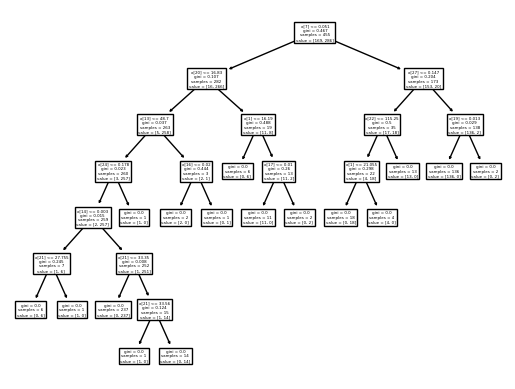

In [6]:
# Basic Decision Tree Model
dt_basic = DecisionTreeClassifier(random_state=42)
dt_basic.fit(X_train, y_train)
predictions_basic = dt_basic.predict(X_test)
accuracy_basic = accuracy_score(y_test, predictions_basic)
_ = tree.plot_tree(dt_basic)
print(f"Accuracy {accuracy_basic} with {count_if_then_clauses(dt_basic)} if-else clauses")

Accuracy 0.9298245614035088 with 3 if-else clauses


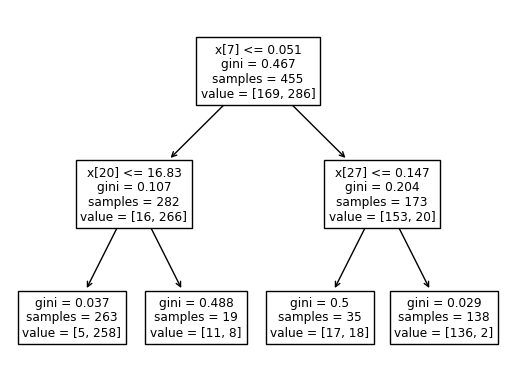

In [7]:
# Decision Tree with Limited Depth
dt_limited_depth = DecisionTreeClassifier(max_depth=2, random_state=42)
dt_limited_depth.fit(X_train, y_train)
predictions_limited_depth = dt_limited_depth.predict(X_test)
accuracy_limited_depth = accuracy_score(y_test, predictions_limited_depth)
_ = tree.plot_tree(dt_limited_depth)
print(f"Accuracy {accuracy_limited_depth} with {count_if_then_clauses(dt_limited_depth)} if-else clauses")

Accuracy 0.956140350877193 with 10 if-else clauses


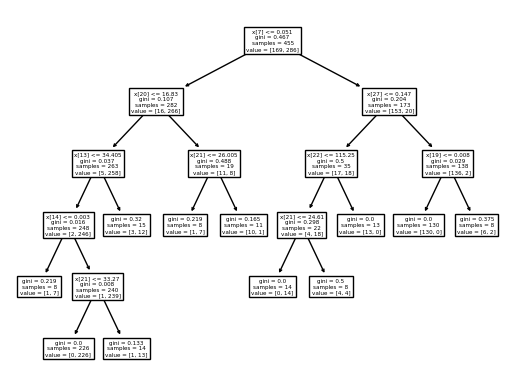

In [8]:
# Decision Tree with Pruning
dt_pruned = DecisionTreeClassifier(min_samples_leaf=8, random_state=42)
dt_pruned.fit(X_train, y_train)
predictions_pruned = dt_pruned.predict(X_test)
accuracy_pruned = accuracy_score(y_test, predictions_pruned)
_ = tree.plot_tree(dt_pruned)
print(f"Accuracy {accuracy_pruned} with {count_if_then_clauses(dt_pruned)} if-else clauses")

### (b) Use the algorithms developed in (a) on different datasets. Again, observe how your choices make a difference.

#### Ans: The default decision achieved an accuracy of 1 with 4 if-then clauses. By limiting the depth to 2, the resultant tree achieved an accuracy of 0.962 with 3 if-else clauses. By setting a minimum number of samples required to create a if-then clause to be 8, the resultant tree achieved an accuracy of 0.923 with 3 if-else clauses. These results are different from (a) such that the tree with most clauses performed the best.

In [11]:
from sklearn.datasets import load_wine
import numpy as np

# Load the wine dataset
data = load_wine()
X, y = data.data, data.target

# Convert to a binary classification task (e.g., classes 0 vs 1, ignoring class 2)
is_class_0_or_1 = (y == 0) | (y == 1)
X_binary = X[is_class_0_or_1]
y_binary = y[is_class_0_or_1]

# Split the binary dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

Accuracy 1.0 with 4 if-else clauses


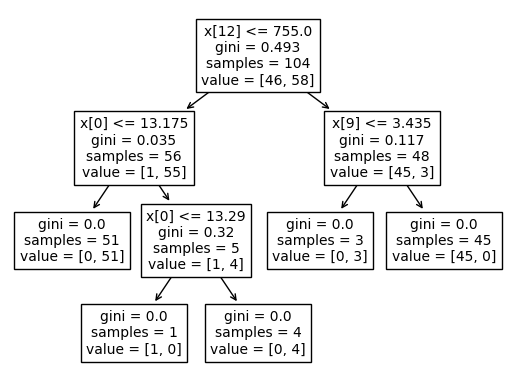

In [12]:
# Basic Decision Tree Model
dt_basic = DecisionTreeClassifier(random_state=42)
dt_basic.fit(X_train, y_train)
predictions_basic = dt_basic.predict(X_test)
accuracy_basic = accuracy_score(y_test, predictions_basic)
_ = tree.plot_tree(dt_basic)
print(f"Accuracy {accuracy_basic} with {count_if_then_clauses(dt_basic)} if-else clauses")

Accuracy 0.9615384615384616 with 3 if-else clauses


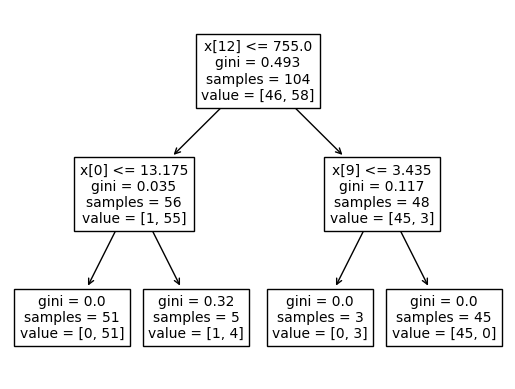

In [13]:
# Decision Tree with Limited Depth
dt_limited_depth = DecisionTreeClassifier(max_depth=2, random_state=42)
dt_limited_depth.fit(X_train, y_train)
predictions_limited_depth = dt_limited_depth.predict(X_test)
accuracy_limited_depth = accuracy_score(y_test, predictions_limited_depth)
_ = tree.plot_tree(dt_limited_depth)
print(f"Accuracy {accuracy_limited_depth} with {count_if_then_clauses(dt_limited_depth)} if-else clauses")

Accuracy 0.9230769230769231 with 3 if-else clauses


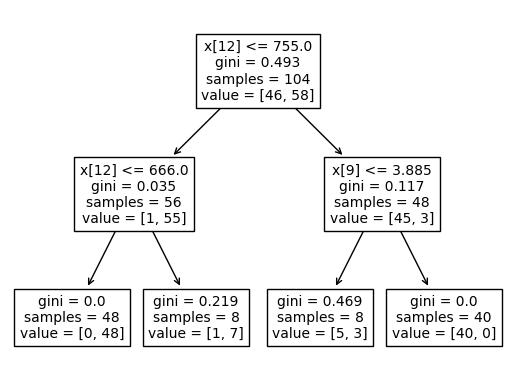

In [14]:
# Decision Tree with Pruning
dt_pruned = DecisionTreeClassifier(min_samples_leaf=8, random_state=42)
dt_pruned.fit(X_train, y_train)
predictions_pruned = dt_pruned.predict(X_test)
accuracy_pruned = accuracy_score(y_test, predictions_pruned)
_ = tree.plot_tree(dt_pruned)
print(f"Accuracy {accuracy_pruned} with {count_if_then_clauses(dt_pruned)} if-else clauses")

### (c) Finally, use the programs developed in (a) on a completely random dataset, generated artificially. Vary your strategies but also the number of input columns as well as the number of instances. How many if-then clauses do you need?

#### Ans: Generally, we need more if-then clauses when the number of instances is larger (as shown in the first experiments below), and less clauses when the number of input columns is large (as shown in the second experiment).

In [15]:
from sklearn.datasets import make_classification

# Function to apply strategies and evaluate a decision tree model
def evaluate_decision_tree(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    strategies = {
        "Basic": DecisionTreeClassifier(random_state=42),
        "Limited Depth": DecisionTreeClassifier(max_depth=3, random_state=42),
        "Pruned": DecisionTreeClassifier(min_samples_leaf=4, random_state=42),
    }

    results = {}
    for name, model in strategies.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        num_clauses = count_if_then_clauses(model)
        results[name] = {"Accuracy": accuracy, "Clauses": num_clauses}

    return results

In [16]:
# Evaluating on different dataset sizes
sizes = [
    (100, 5),  # Small dataset: 100 instances, 5 features
    (500, 5), # Medium dataset: 500 instances, 5 features
    (1000, 5) # Large dataset: 1000 instances, 5 features
]

evaluation_results = {}

for size, (instances, features) in enumerate(sizes, start=1):
    X, y = make_classification(n_samples=instances, n_features=features, n_classes=2, random_state=42)
    evaluation_results[f"Dataset {size} ({instances} instances, {features} features)"] = evaluate_decision_tree(X, y)

evaluation_results

{'Dataset 1 (100 instances, 5 features)': {'Basic': {'Accuracy': 0.85,
   'Clauses': 4},
  'Limited Depth': {'Accuracy': 0.85, 'Clauses': 4},
  'Pruned': {'Accuracy': 1.0, 'Clauses': 3}},
 'Dataset 2 (500 instances, 5 features)': {'Basic': {'Accuracy': 0.96,
   'Clauses': 25},
  'Limited Depth': {'Accuracy': 0.91, 'Clauses': 6},
  'Pruned': {'Accuracy': 0.95, 'Clauses': 18}},
 'Dataset 3 (1000 instances, 5 features)': {'Basic': {'Accuracy': 0.835,
   'Clauses': 75},
  'Limited Depth': {'Accuracy': 0.865, 'Clauses': 7},
  'Pruned': {'Accuracy': 0.87, 'Clauses': 48}}}

In [17]:
# Evaluating on different dataset sizes
sizes = [
    (100, 5),  # Easy dataset: 100 instances, 5 features
    (100, 10), # Medium dataset: 100 instances, 10 features
    (100, 20) # Complex dataset: 100 instances, 20 features
]

evaluation_results = {}

for size, (instances, features) in enumerate(sizes, start=1):
    X, y = make_classification(n_samples=instances, n_features=features, n_classes=2, random_state=42)
    evaluation_results[f"Dataset {size} ({instances} instances, {features} features)"] = evaluate_decision_tree(X, y)

evaluation_results

{'Dataset 1 (100 instances, 5 features)': {'Basic': {'Accuracy': 0.85,
   'Clauses': 4},
  'Limited Depth': {'Accuracy': 0.85, 'Clauses': 4},
  'Pruned': {'Accuracy': 1.0, 'Clauses': 3}},
 'Dataset 2 (100 instances, 10 features)': {'Basic': {'Accuracy': 0.85,
   'Clauses': 4},
  'Limited Depth': {'Accuracy': 0.8, 'Clauses': 3},
  'Pruned': {'Accuracy': 1.0, 'Clauses': 3}},
 'Dataset 3 (100 instances, 20 features)': {'Basic': {'Accuracy': 0.9,
   'Clauses': 2},
  'Limited Depth': {'Accuracy': 0.9, 'Clauses': 2},
  'Pruned': {'Accuracy': 0.85, 'Clauses': 2}}}